In [5]:
import sys
sys.path.append('..')
import numpy as np
import os
import matplotlib.pyplot as plt
from ..Participants import Participants
import pandas as pd
import seaborn as sns

ImportError: attempted relative import with no known parent package

In [ ]:
participants = Participants("../data/participants")

## Plotting the ditribution of participant means for each channel

### 1 plot = 1 channel

/Users/pavlepadjin/miniforge3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pavlepadjin/miniforge3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pavlepadjin/miniforge3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

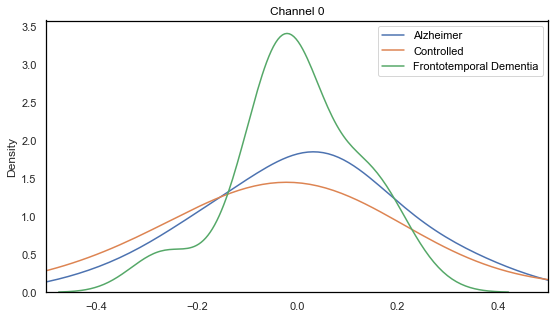

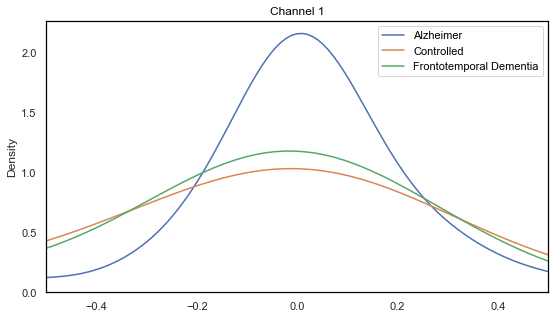

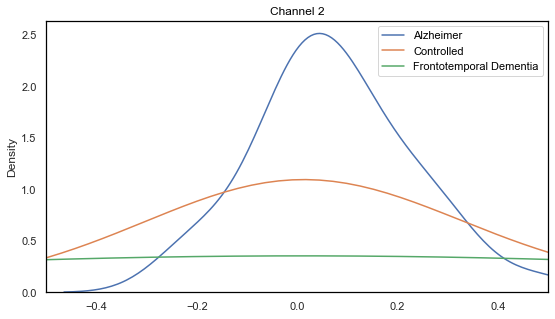

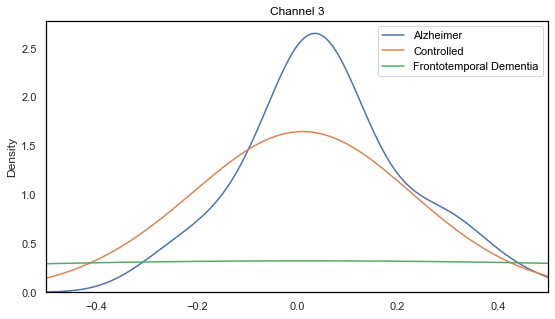

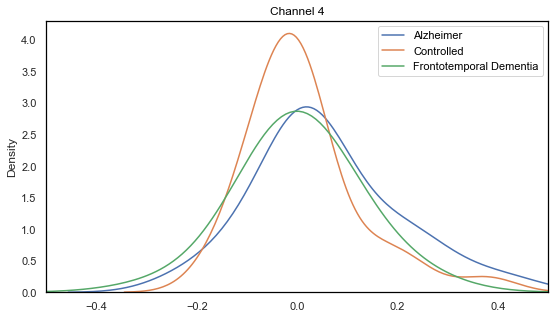

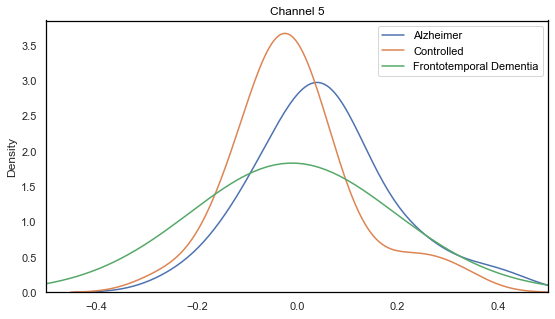

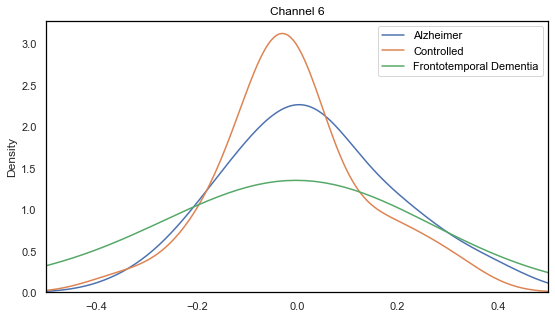

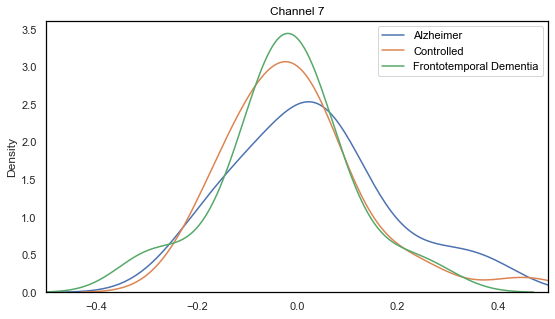

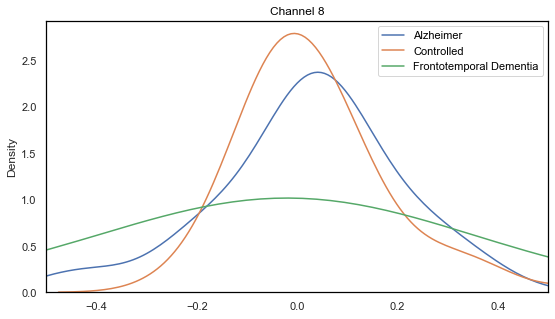

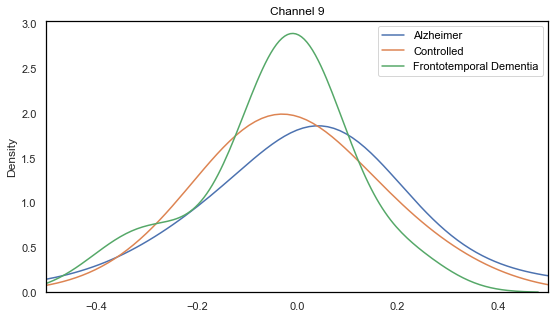

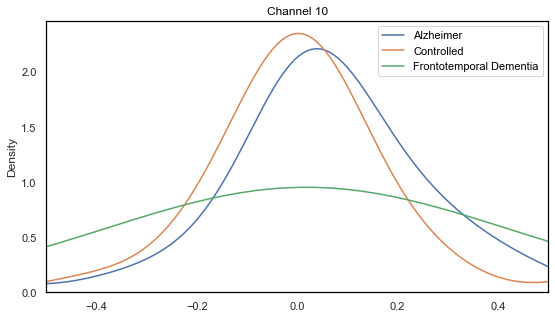

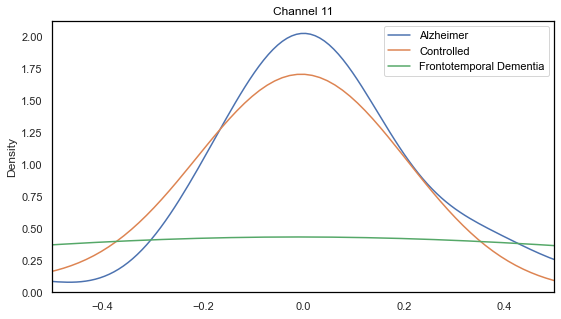

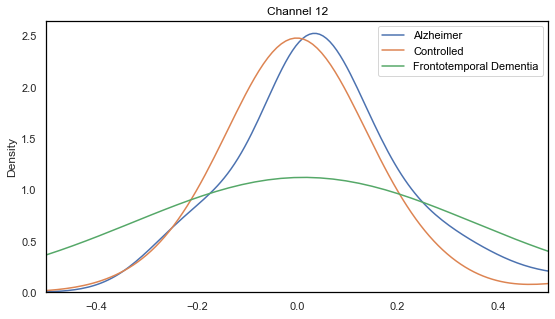

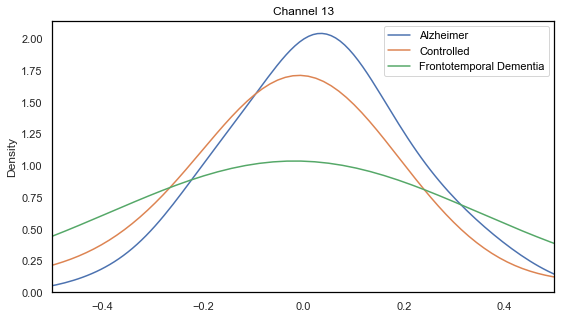

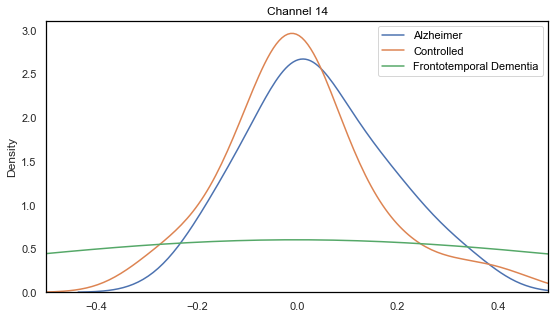

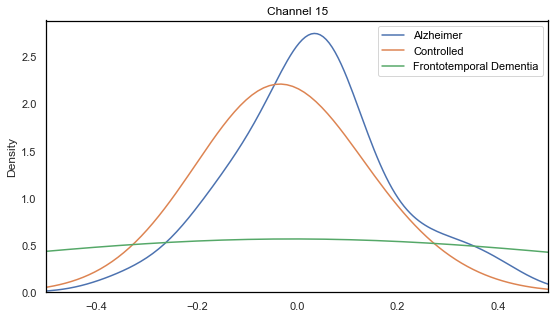

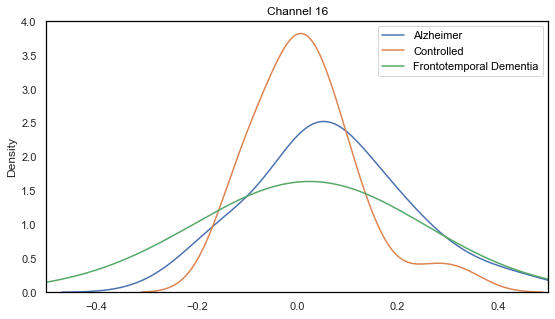

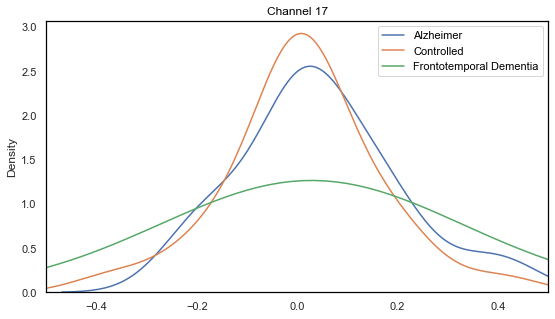

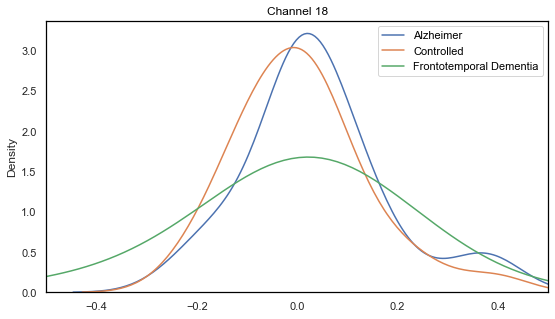

In [ ]:
for ch in range(19):
    means = [participants[i][0][ch].mean() for i in range(len(participants))]
    groups = [participants[i][3] for i in range(len(participants))]
    fig, ax = plt.subplots()
    #sns.set_theme(style="darkgrid")
    sns.set_style({'axes.edgecolor': '0', 'axes.facecolor': 'white', 'axes.grid': True, 'axes.linewidth': 1.5, 'grid.color': '.8', 'grid.linestyle': '-', 'image.cmap': 'rocket_r', 'legend.frameon': True, 'legend.numpoints': 1, 'legend.scatterpoints': 1, 'lines.solid_capstyle': 'round', 'text.color': '0', 'xtick.direction': 'out', 'xtick.major.size': 6.0, 'xtick.minor.size': 3.0, 'ytick.direction': 'out', 'ytick.major.size': 6.0, 'ytick.minor.size': 3.0})

    sns.distplot([means[i] for i in range(len(means)) if groups[i] == 'A'], hist=False, label='Alzheimer')
    sns.distplot([means[i] for i in range(len(means)) if groups[i] == 'C'], hist=False, label='Controlled')
    sns.distplot([means[i] for i in range(len(means)) if groups[i] == 'F'], hist=False, label='Frontotemporal Dementia')

    plt.grid()
    plt.xlim(-0.5, 0.5)
    plt.title(f"Channel {ch}")
    plt.legend()
    fig.set_size_inches(9, 5)
    fig.savefig(f"../data/plots/means_ch{ch}.png")

#### Comment:
We can see that distribution of means is often wider for frontotemporal dementia, while Alzheimer and control groups have similar distributions. That means that the mean of the channel is a good feature to distinguish frontotemporal dementia from Alzheimer and control groups, but not Alzheimer from control groups.

In [ ]:
stds

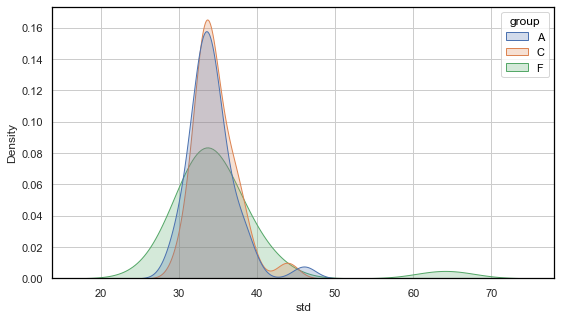

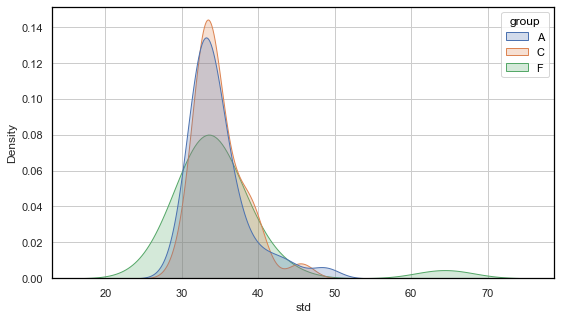

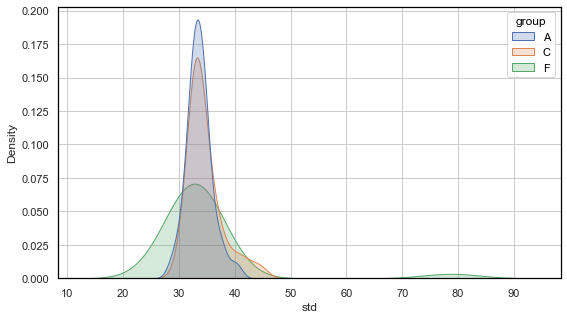

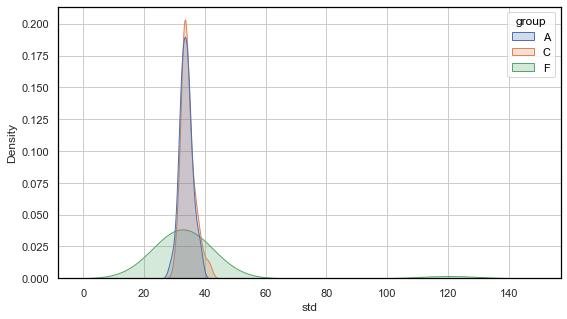

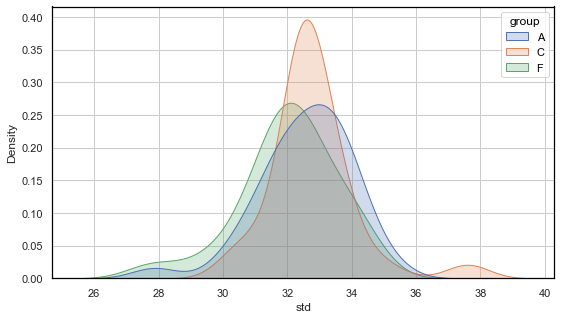

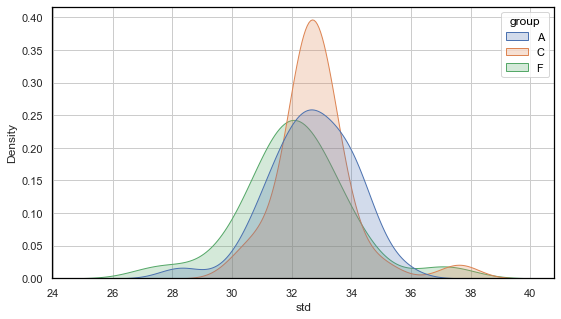

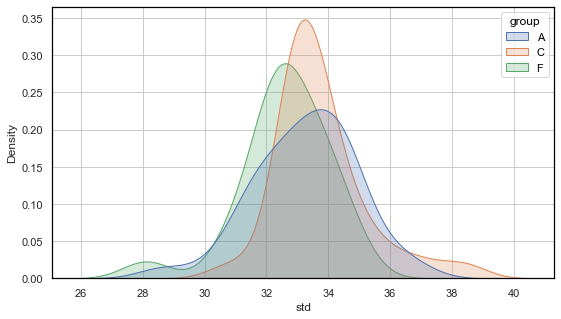

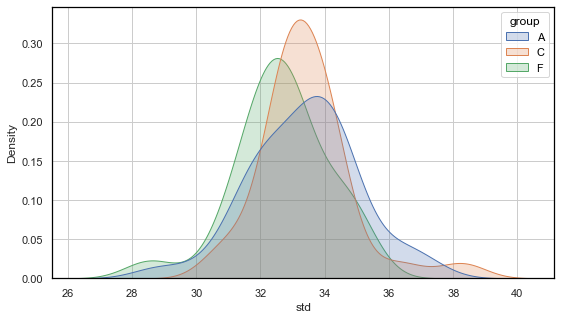

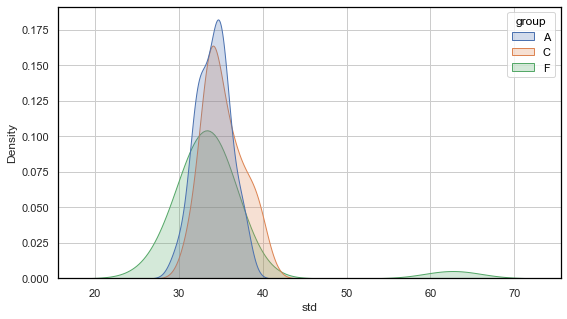

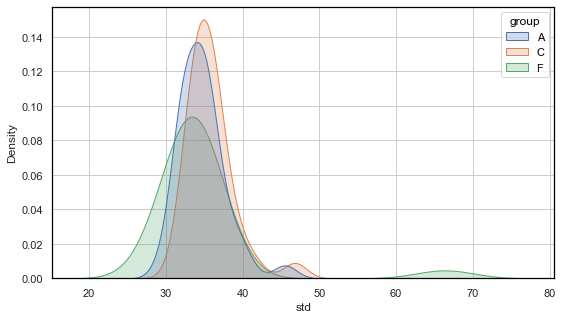

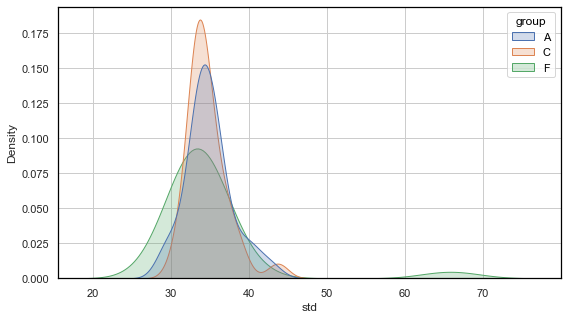

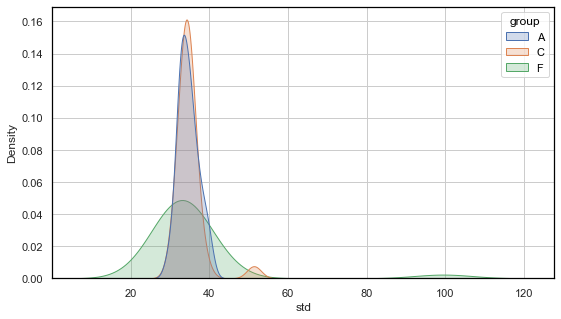

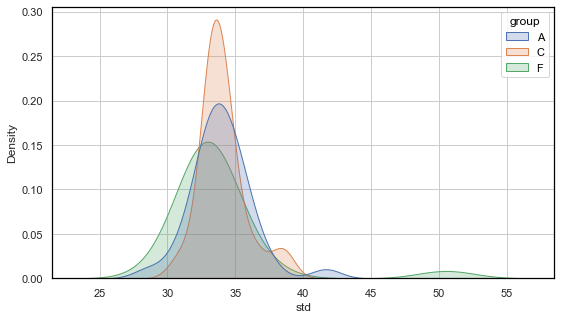

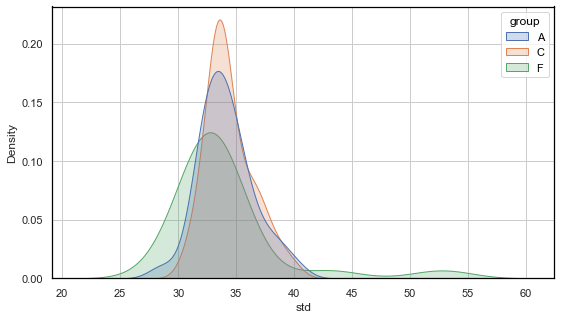

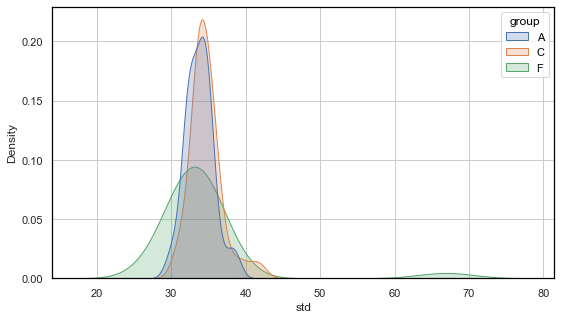

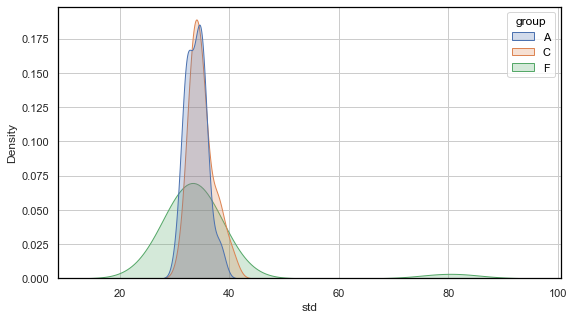

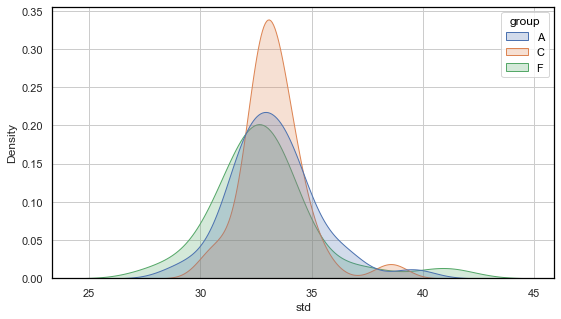

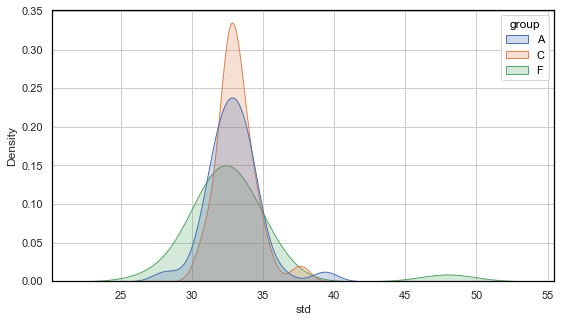

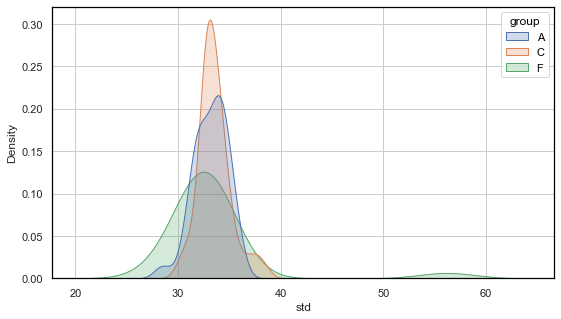

In [ ]:
for ch in range(19):
    stds = [participants[i][0][ch].std() for i in range(len(participants))]
    groups = [participants[i][3] for i in range(len(participants))]
    fig, ax = plt.subplots()
    sns.set_style({'axes.edgecolor': '0', 'axes.facecolor': 'white', 'axes.grid': True, 'axes.linewidth': 1.5, 'grid.color': '.8', 'grid.linestyle': '-', 'image.cmap': 'rocket_r', 'legend.frameon': True, 'legend.numpoints': 1, 'legend.scatterpoints': 1, 'lines.solid_capstyle': 'round', 'text.color': '0', 'xtick.direction': 'out', 'xtick.major.size': 6.0, 'xtick.minor.size': 3.0, 'ytick.direction': 'out', 'ytick.major.size': 6.0, 'ytick.minor.size': 3.0})

    data = pd.DataFrame({'std': stds, 'group': groups})


    #std_a = [stds[i] for i in range(len(stds)) if groups[i] == 'A']
    #std_c = [stds[i] for i in range(len(stds)) if groups[i] == 'C']
    #std_f = [stds[i] for i in range(len(stds)) if groups[i] == 'F']
    
    sns.kdeplot(data=data, x='std', hue='group', fill=True, common_norm=False)

    
    #sns.displot([stds[i] for i in range(len(stds)) if groups[i] == 'C'], kind='kde', label='Controlled')
    #sns.displot([stds[i] for i in range(len(stds)) if groups[i] == 'F'], kind='kde', label='Frontotemporal Dementia')

    #plt.grid()
    #plt.xlim(-0.5, 0.5)
    #plt.title(f"Channel {ch}")
    #plt.legend()
    fig.set_size_inches(9, 5)
    fig.savefig(f"../data/plots/std_ch{ch}.png")